In [14]:
#installing the required packages for google colab
!pip install https://github.com/nithinmurali/pygsheets/archive/master.zip
!apt-get -qq install -y graphviz && pip install -q pydot

    100% |████████████████████████████████| 112kB 2.7MB/s 
  Running setup.py bdist_wheel for pygsheets ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-kh0tw7ey/wheels/d9/57/8e/549fffb1482b9d3ec4f60a378f4c32f3dbba74e4aad728dd27
Successfully built pygsheets


In [15]:
#authorize 1
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpiqekjqch/pubring.gpg' created
gpg: /tmp/tmpiqekjqch/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


In [0]:
#authorize
!pip install -U -q PyDrive ## you will have install for every colab session
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygsheets

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from keras.initializers import *
from sklearn.preprocessing import *
from sklearn.metrics import *


In [19]:
#accessing the drive
!mkdir -p drive
!google-drive-ocamlfuse drive


fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
#loading the google sheets
gc = pygsheets.authorize(outh_file='drive/Colab Notebooks/client_secret_430362481330-rp2r1tr6c5p8ef3q3ip4vfhtfabmqehf.apps.googleusercontent.com.json',outh_nonlocal=True)

In [0]:
# Open spreadsheet and then workseet
sh = gc.open('loss analysis')
wks = sh.sheet1

In [0]:
#loading the dataset from drive to colab
imp = drive.CreateFile({'id':'1Wcf0XRJa1R02lvlUhJl7vcvSN9TVWYW0'})
imp.GetContentFile('pima-indians-diabetes.csv')

In [23]:
#colab to pandas
df= pd.read_csv("pima-indians-diabetes.csv")
df.columns = np.arange(9) #rename labels
df

,0,1,2,3,4,5,6,7,8
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


In [0]:
X = df.iloc[:,0:8] #independent variable
Y = df.iloc[:,8] #dependent variable

In [0]:
funct = []
funct.append('mean_squared_error')
funct.append('mean_absolute_error')
funct.append('mean_absolute_percentage_error')
funct.append('mean_squared_logarithmic_error')
funct.append('squared_hinge')
funct.append('hinge')
funct.append('categorical_hinge')
funct.append('logcosh')
funct.append('binary_crossentropy')
funct.append('kullback_leibler_divergence')
funct.append('poisson')
funct.append('cosine_proximity')

In [26]:
analysisdf = pd.DataFrame(columns= ["loss function",
                                    "accuracy"])
analysisdf  

,loss function,accuracy


Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 2ms/step - loss: 0.1877 - acc: 0.6786 - val_loss: 0.1954 - val_acc: 0.7273
Epoch 2/150
613/613 [==============================] - 0s 74us/step - loss: 0.1579 - acc: 0.7586 - val_loss: 0.1665 - val_acc: 0.7532
Epoch 3/150
613/613 [==============================] - 0s 70us/step - loss: 0.1488 - acc: 0.7830 - val_loss: 0.1787 - val_acc: 0.7597
Epoch 4/150
613/613 [==============================] - 0s 71us/step - loss: 0.1494 - acc: 0.7814 - val_loss: 0.1600 - val_acc: 0.7532
Epoch 5/150
613/613 [==============================] - 0s 68us/step - loss: 0.1471 - acc: 0.7814 - val_loss: 0.1614 - val_acc: 0.7727
Epoch 6/150
613/613 [==============================] - 0s 69us/step - loss: 0.1418 - acc: 0.7847 - val_loss: 0.1585 - val_acc: 0.7792
Epoch 7/150
613/613 [==============================] - 0s 79us/step - loss: 0.1394 - acc: 0.7993 - val_loss: 0.1467 - val_acc: 0.7922
Epoch 8/150
613/6

Epoch 24/150
613/613 [==============================] - 0s 90us/step - loss: 0.1082 - acc: 0.8564 - val_loss: 0.1762 - val_acc: 0.7597
Epoch 25/150
613/613 [==============================] - 0s 82us/step - loss: 0.1034 - acc: 0.8744 - val_loss: 0.1761 - val_acc: 0.7662
Epoch 26/150
613/613 [==============================] - 0s 82us/step - loss: 0.1085 - acc: 0.8532 - val_loss: 0.1659 - val_acc: 0.7922
Epoch 27/150
613/613 [==============================] - 0s 86us/step - loss: 0.1056 - acc: 0.8564 - val_loss: 0.1751 - val_acc: 0.7922
Epoch 28/150
613/613 [==============================] - 0s 84us/step - loss: 0.1072 - acc: 0.8483 - val_loss: 0.1640 - val_acc: 0.7987
Epoch 29/150
613/613 [==============================] - 0s 82us/step - loss: 0.1022 - acc: 0.8630 - val_loss: 0.1540 - val_acc: 0.8247
Epoch 30/150
613/613 [==============================] - 0s 80us/step - loss: 0.0951 - acc: 0.8760 - val_loss: 0.1805 - val_acc: 0.7597
Epoch 31/150
613/613 [==============================] -

613/613 [==============================] - 0s 85us/step - loss: 0.0683 - acc: 0.9282 - val_loss: 0.1808 - val_acc: 0.7532
Epoch 51/150
613/613 [==============================] - 0s 88us/step - loss: 0.0748 - acc: 0.9070 - val_loss: 0.1834 - val_acc: 0.7727
Epoch 52/150
613/613 [==============================] - 0s 103us/step - loss: 0.0712 - acc: 0.9103 - val_loss: 0.1749 - val_acc: 0.7792
Epoch 53/150
613/613 [==============================] - 0s 82us/step - loss: 0.0605 - acc: 0.9347 - val_loss: 0.1723 - val_acc: 0.7922
Epoch 54/150
613/613 [==============================] - 0s 83us/step - loss: 0.0652 - acc: 0.9168 - val_loss: 0.1886 - val_acc: 0.7662
Epoch 55/150
613/613 [==============================] - 0s 77us/step - loss: 0.0595 - acc: 0.9347 - val_loss: 0.1898 - val_acc: 0.7922
Epoch 56/150
613/613 [==============================] - 0s 80us/step - loss: 0.0631 - acc: 0.9282 - val_loss: 0.1802 - val_acc: 0.7922
Epoch 57/150
613/613 [==============================] - 0s 81us/ste

613/613 [==============================] - 0s 84us/step - loss: 0.0406 - acc: 0.9576 - val_loss: 0.2339 - val_acc: 0.7143
Epoch 77/150
613/613 [==============================] - 0s 106us/step - loss: 0.0500 - acc: 0.9462 - val_loss: 0.1996 - val_acc: 0.7468
Epoch 78/150
613/613 [==============================] - 0s 82us/step - loss: 0.0387 - acc: 0.9608 - val_loss: 0.1965 - val_acc: 0.7662
Epoch 79/150
613/613 [==============================] - 0s 81us/step - loss: 0.0426 - acc: 0.9543 - val_loss: 0.2061 - val_acc: 0.7662
Epoch 80/150
613/613 [==============================] - 0s 84us/step - loss: 0.0337 - acc: 0.9674 - val_loss: 0.2120 - val_acc: 0.7403
Epoch 81/150
613/613 [==============================] - 0s 86us/step - loss: 0.0457 - acc: 0.9494 - val_loss: 0.2032 - val_acc: 0.7662
Epoch 82/150
613/613 [==============================] - 0s 83us/step - loss: 0.0383 - acc: 0.9592 - val_loss: 0.2084 - val_acc: 0.7662
Epoch 83/150
613/613 [==============================] - 0s 95us/ste

613/613 [==============================] - 0s 83us/step - loss: 0.0213 - acc: 0.9821 - val_loss: 0.2147 - val_acc: 0.7597
Epoch 103/150
613/613 [==============================] - 0s 84us/step - loss: 0.0246 - acc: 0.9755 - val_loss: 0.2106 - val_acc: 0.7597
Epoch 104/150
613/613 [==============================] - 0s 89us/step - loss: 0.0388 - acc: 0.9527 - val_loss: 0.2406 - val_acc: 0.7273
Epoch 105/150
613/613 [==============================] - 0s 82us/step - loss: 0.0416 - acc: 0.9543 - val_loss: 0.2059 - val_acc: 0.7597
Epoch 106/150
613/613 [==============================] - 0s 80us/step - loss: 0.0208 - acc: 0.9821 - val_loss: 0.2115 - val_acc: 0.7662
Epoch 107/150
613/613 [==============================] - 0s 89us/step - loss: 0.0262 - acc: 0.9739 - val_loss: 0.2192 - val_acc: 0.7597
Epoch 108/150
613/613 [==============================] - 0s 79us/step - loss: 0.0323 - acc: 0.9625 - val_loss: 0.2219 - val_acc: 0.7403
Epoch 109/150
613/613 [==============================] - 0s 81

Epoch 128/150
613/613 [==============================] - 0s 81us/step - loss: 0.0241 - acc: 0.9723 - val_loss: 0.2193 - val_acc: 0.7468
Epoch 129/150
613/613 [==============================] - 0s 85us/step - loss: 0.0221 - acc: 0.9755 - val_loss: 0.2152 - val_acc: 0.7662
Epoch 130/150
613/613 [==============================] - 0s 80us/step - loss: 0.0313 - acc: 0.9641 - val_loss: 0.2107 - val_acc: 0.7597
Epoch 131/150
613/613 [==============================] - 0s 93us/step - loss: 0.0184 - acc: 0.9837 - val_loss: 0.2246 - val_acc: 0.7403
Epoch 132/150
613/613 [==============================] - 0s 82us/step - loss: 0.0203 - acc: 0.9788 - val_loss: 0.2108 - val_acc: 0.7727
Epoch 133/150
613/613 [==============================] - 0s 80us/step - loss: 0.0426 - acc: 0.9511 - val_loss: 0.2167 - val_acc: 0.7597
Epoch 134/150
613/613 [==============================] - 0s 87us/step - loss: 0.0203 - acc: 0.9821 - val_loss: 0.2245 - val_acc: 0.7468
Epoch 135/150
613/613 [=========================

613/613 [==============================] - 0s 86us/step - loss: 0.2226 - acc: 0.7863 - val_loss: 0.2482 - val_acc: 0.7662
Epoch 4/150
613/613 [==============================] - 0s 78us/step - loss: 0.2228 - acc: 0.7781 - val_loss: 0.2469 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 83us/step - loss: 0.2214 - acc: 0.7765 - val_loss: 0.2493 - val_acc: 0.7403
Epoch 6/150
613/613 [==============================] - 0s 80us/step - loss: 0.2147 - acc: 0.7814 - val_loss: 0.2495 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 96us/step - loss: 0.2172 - acc: 0.7879 - val_loss: 0.2422 - val_acc: 0.7597
Epoch 8/150
613/613 [==============================] - 0s 87us/step - loss: 0.2092 - acc: 0.7945 - val_loss: 0.2450 - val_acc: 0.7662
Epoch 9/150
613/613 [==============================] - 0s 89us/step - loss: 0.2086 - acc: 0.7928 - val_loss: 0.2512 - val_acc: 0.7597
Epoch 10/150
613/613 [==============================] - 0s 80us/step - los

Epoch 30/150
613/613 [==============================] - 0s 85us/step - loss: 0.1813 - acc: 0.8206 - val_loss: 0.2342 - val_acc: 0.7662
Epoch 31/150
613/613 [==============================] - 0s 83us/step - loss: 0.1818 - acc: 0.8189 - val_loss: 0.2397 - val_acc: 0.7597
Epoch 32/150
613/613 [==============================] - 0s 94us/step - loss: 0.1791 - acc: 0.8206 - val_loss: 0.2342 - val_acc: 0.7662
Epoch 33/150
613/613 [==============================] - 0s 80us/step - loss: 0.1828 - acc: 0.8157 - val_loss: 0.2420 - val_acc: 0.7597
Epoch 34/150
613/613 [==============================] - 0s 85us/step - loss: 0.1793 - acc: 0.8222 - val_loss: 0.2435 - val_acc: 0.7532
Epoch 35/150
613/613 [==============================] - 0s 85us/step - loss: 0.1828 - acc: 0.8189 - val_loss: 0.2603 - val_acc: 0.7403
Epoch 36/150
613/613 [==============================] - 0s 89us/step - loss: 0.1804 - acc: 0.8206 - val_loss: 0.2391 - val_acc: 0.7597
Epoch 37/150
613/613 [==============================] -

613/613 [==============================] - 0s 85us/step - loss: 0.1617 - acc: 0.8385 - val_loss: 0.2465 - val_acc: 0.7532
Epoch 57/150
613/613 [==============================] - 0s 81us/step - loss: 0.1617 - acc: 0.8385 - val_loss: 0.2613 - val_acc: 0.7403
Epoch 58/150
613/613 [==============================] - 0s 80us/step - loss: 0.1572 - acc: 0.8434 - val_loss: 0.2564 - val_acc: 0.7468
Epoch 59/150
613/613 [==============================] - 0s 79us/step - loss: 0.1592 - acc: 0.8418 - val_loss: 0.2635 - val_acc: 0.7338
Epoch 60/150
613/613 [==============================] - 0s 81us/step - loss: 0.1587 - acc: 0.8418 - val_loss: 0.2658 - val_acc: 0.7338
Epoch 61/150
613/613 [==============================] - 0s 91us/step - loss: 0.1638 - acc: 0.8369 - val_loss: 0.2535 - val_acc: 0.7468
Epoch 62/150
613/613 [==============================] - 0s 83us/step - loss: 0.1765 - acc: 0.8238 - val_loss: 0.2423 - val_acc: 0.7597
Epoch 63/150
613/613 [==============================] - 0s 82us/step

613/613 [==============================] - 0s 85us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2659 - val_acc: 0.7338
Epoch 83/150
613/613 [==============================] - 0s 86us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2659 - val_acc: 0.7338
Epoch 84/150
613/613 [==============================] - 0s 79us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2658 - val_acc: 0.7338
Epoch 85/150
613/613 [==============================] - 0s 88us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2657 - val_acc: 0.7338
Epoch 86/150
613/613 [==============================] - 0s 84us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2658 - val_acc: 0.7338
Epoch 87/150
613/613 [==============================] - 0s 94us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2648 - val_acc: 0.7338
Epoch 88/150
613/613 [==============================] - 0s 79us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2645 - val_acc: 0.7338
Epoch 89/150
613/613 [==============================] - 0s 86us/step

613/613 [==============================] - 0s 80us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2662 - val_acc: 0.7338
Epoch 109/150
613/613 [==============================] - 0s 81us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2662 - val_acc: 0.7338
Epoch 110/150
613/613 [==============================] - 0s 79us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2662 - val_acc: 0.7338
Epoch 111/150
613/613 [==============================] - 0s 83us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2662 - val_acc: 0.7338
Epoch 112/150
613/613 [==============================] - 0s 90us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2662 - val_acc: 0.7338
Epoch 113/150
613/613 [==============================] - 0s 98us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2662 - val_acc: 0.7338
Epoch 114/150
613/613 [==============================] - 0s 78us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2662 - val_acc: 0.7338
Epoch 115/150
613/613 [==============================] - 0s 85

613/613 [==============================] - 0s 86us/step - loss: 0.1517 - acc: 0.8483 - val_loss: 0.2597 - val_acc: 0.7403
Epoch 135/150
613/613 [==============================] - 0s 86us/step - loss: 0.1550 - acc: 0.8450 - val_loss: 0.2330 - val_acc: 0.7662
Epoch 136/150
613/613 [==============================] - 0s 81us/step - loss: 0.2295 - acc: 0.7684 - val_loss: 0.2665 - val_acc: 0.7338
Epoch 137/150
613/613 [==============================] - 0s 85us/step - loss: 0.2081 - acc: 0.7928 - val_loss: 0.2482 - val_acc: 0.7532
Epoch 138/150
613/613 [==============================] - 0s 85us/step - loss: 0.1966 - acc: 0.8026 - val_loss: 0.2426 - val_acc: 0.7597
Epoch 139/150
613/613 [==============================] - 0s 85us/step - loss: 0.1913 - acc: 0.8091 - val_loss: 0.2478 - val_acc: 0.7532
Epoch 140/150
613/613 [==============================] - 0s 84us/step - loss: 0.1860 - acc: 0.8140 - val_loss: 0.2532 - val_acc: 0.7403
Epoch 141/150
613/613 [==============================] - 0s 85

613/613 [==============================] - 0s 84us/step - loss: 17819.8051 - acc: 0.6542 - val_loss: 20172.1214 - val_acc: 0.6429
Epoch 10/150
613/613 [==============================] - 0s 90us/step - loss: 11251.5117 - acc: 0.6542 - val_loss: 13898.2232 - val_acc: 0.6429
Epoch 11/150
613/613 [==============================] - 0s 86us/step - loss: 7412.2261 - acc: 0.6542 - val_loss: 9625.5947 - val_acc: 0.6429
Epoch 12/150
613/613 [==============================] - 0s 80us/step - loss: 4831.4265 - acc: 0.6542 - val_loss: 6387.5894 - val_acc: 0.6429
Epoch 13/150
613/613 [==============================] - 0s 92us/step - loss: 3034.8318 - acc: 0.6542 - val_loss: 4443.9119 - val_acc: 0.6429
Epoch 14/150
613/613 [==============================] - 0s 78us/step - loss: 1986.3913 - acc: 0.6542 - val_loss: 2896.7939 - val_acc: 0.6429
Epoch 15/150
613/613 [==============================] - 0s 80us/step - loss: 1228.5997 - acc: 0.6542 - val_loss: 2099.3803 - val_acc: 0.6429
Epoch 16/150
613/613 [

Epoch 35/150
613/613 [==============================] - 0s 83us/step - loss: 34.9284 - acc: 0.6542 - val_loss: 38.3409 - val_acc: 0.6429
Epoch 36/150
613/613 [==============================] - 0s 87us/step - loss: 34.7933 - acc: 0.6542 - val_loss: 37.7446 - val_acc: 0.6429
Epoch 37/150
613/613 [==============================] - 0s 83us/step - loss: 34.7327 - acc: 0.6542 - val_loss: 37.2217 - val_acc: 0.6429
Epoch 38/150
613/613 [==============================] - 0s 81us/step - loss: 34.6852 - acc: 0.6542 - val_loss: 36.8487 - val_acc: 0.6429
Epoch 39/150
613/613 [==============================] - 0s 95us/step - loss: 34.6539 - acc: 0.6542 - val_loss: 36.5582 - val_acc: 0.6429
Epoch 40/150
613/613 [==============================] - 0s 85us/step - loss: 34.6318 - acc: 0.6542 - val_loss: 36.3347 - val_acc: 0.6429
Epoch 41/150
613/613 [==============================] - 0s 79us/step - loss: 34.6166 - acc: 0.6542 - val_loss: 36.1765 - val_acc: 0.6429
Epoch 42/150
613/613 [===================

613/613 [==============================] - 0s 84us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7152 - val_acc: 0.6429
Epoch 62/150
613/613 [==============================] - 0s 77us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7150 - val_acc: 0.6429
Epoch 63/150
613/613 [==============================] - 0s 92us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7148 - val_acc: 0.6429
Epoch 64/150
613/613 [==============================] - 0s 84us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7147 - val_acc: 0.6429
Epoch 65/150
613/613 [==============================] - 0s 87us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7145 - val_acc: 0.6429
Epoch 66/150
613/613 [==============================] - 0s 83us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7145 - val_acc: 0.6429
Epoch 67/150
613/613 [==============================] - 0s 86us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7144 - val_acc: 0.6429
Epoch 68/150
613/613 [==============================] 

613/613 [==============================] - 0s 90us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 88/150
613/613 [==============================] - 0s 81us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 89/150
613/613 [==============================] - 0s 81us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 90/150
613/613 [==============================] - 0s 86us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 91/150
613/613 [==============================] - 0s 84us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 92/150
613/613 [==============================] - 0s 82us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 93/150
613/613 [==============================] - 0s 78us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 94/150
613/613 [==============================] 

613/613 [==============================] - 0s 91us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 114/150
613/613 [==============================] - 0s 80us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 115/150
613/613 [==============================] - 0s 92us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 116/150
613/613 [==============================] - 0s 90us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 117/150
613/613 [==============================] - 0s 89us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 118/150
613/613 [==============================] - 0s 85us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 119/150
613/613 [==============================] - 0s 89us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 120/150
613/613 [=========================

613/613 [==============================] - 0s 88us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 140/150
613/613 [==============================] - 0s 85us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 141/150
613/613 [==============================] - 0s 80us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 142/150
613/613 [==============================] - 0s 87us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 143/150
613/613 [==============================] - 0s 83us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 144/150
613/613 [==============================] - 0s 84us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 145/150
613/613 [==============================] - 0s 79us/step - loss: 34.5840 - acc: 0.6542 - val_loss: 35.7143 - val_acc: 0.6429
Epoch 146/150
613/613 [=========================

613/613 [==============================] - 0s 82us/step - loss: 0.0636 - acc: 0.8042 - val_loss: 0.0758 - val_acc: 0.7597
Epoch 15/150
613/613 [==============================] - 0s 88us/step - loss: 0.0619 - acc: 0.8042 - val_loss: 0.0703 - val_acc: 0.7987
Epoch 16/150
613/613 [==============================] - 0s 87us/step - loss: 0.0616 - acc: 0.8059 - val_loss: 0.0771 - val_acc: 0.8052
Epoch 17/150
613/613 [==============================] - 0s 84us/step - loss: 0.0598 - acc: 0.8157 - val_loss: 0.0771 - val_acc: 0.7662
Epoch 18/150
613/613 [==============================] - 0s 81us/step - loss: 0.0586 - acc: 0.8287 - val_loss: 0.0738 - val_acc: 0.7792
Epoch 19/150
613/613 [==============================] - 0s 98us/step - loss: 0.0584 - acc: 0.8271 - val_loss: 0.0733 - val_acc: 0.7987
Epoch 20/150
613/613 [==============================] - 0s 87us/step - loss: 0.0582 - acc: 0.8271 - val_loss: 0.0766 - val_acc: 0.8117
Epoch 21/150
613/613 [==============================] - 0s 86us/step

613/613 [==============================] - 0s 86us/step - loss: 0.0395 - acc: 0.8989 - val_loss: 0.0778 - val_acc: 0.7922
Epoch 41/150
613/613 [==============================] - 0s 88us/step - loss: 0.0452 - acc: 0.8760 - val_loss: 0.0780 - val_acc: 0.8117
Epoch 42/150
613/613 [==============================] - 0s 83us/step - loss: 0.0384 - acc: 0.9021 - val_loss: 0.0915 - val_acc: 0.7532
Epoch 43/150
613/613 [==============================] - 0s 100us/step - loss: 0.0400 - acc: 0.8989 - val_loss: 0.0834 - val_acc: 0.7922
Epoch 44/150
613/613 [==============================] - 0s 84us/step - loss: 0.0353 - acc: 0.9103 - val_loss: 0.0844 - val_acc: 0.7922
Epoch 45/150
613/613 [==============================] - 0s 84us/step - loss: 0.0445 - acc: 0.8793 - val_loss: 0.0904 - val_acc: 0.7662
Epoch 46/150
613/613 [==============================] - 0s 83us/step - loss: 0.0377 - acc: 0.9038 - val_loss: 0.0881 - val_acc: 0.7792
Epoch 47/150
613/613 [==============================] - 0s 86us/ste

613/613 [==============================] - 0s 85us/step - loss: 0.0254 - acc: 0.9429 - val_loss: 0.0976 - val_acc: 0.7468
Epoch 67/150
613/613 [==============================] - 0s 101us/step - loss: 0.0276 - acc: 0.9315 - val_loss: 0.0948 - val_acc: 0.7662
Epoch 68/150
613/613 [==============================] - 0s 84us/step - loss: 0.0267 - acc: 0.9315 - val_loss: 0.0941 - val_acc: 0.7597
Epoch 69/150
613/613 [==============================] - 0s 89us/step - loss: 0.0292 - acc: 0.9299 - val_loss: 0.0950 - val_acc: 0.7727
Epoch 70/150
613/613 [==============================] - 0s 90us/step - loss: 0.0231 - acc: 0.9413 - val_loss: 0.1036 - val_acc: 0.7468
Epoch 71/150
613/613 [==============================] - 0s 85us/step - loss: 0.0266 - acc: 0.9331 - val_loss: 0.0941 - val_acc: 0.7792
Epoch 72/150
613/613 [==============================] - 0s 85us/step - loss: 0.0254 - acc: 0.9347 - val_loss: 0.1029 - val_acc: 0.7468
Epoch 73/150
613/613 [==============================] - 0s 95us/ste

613/613 [==============================] - 0s 87us/step - loss: 0.0222 - acc: 0.9478 - val_loss: 0.1091 - val_acc: 0.7403
Epoch 93/150
613/613 [==============================] - 0s 84us/step - loss: 0.0209 - acc: 0.9429 - val_loss: 0.1018 - val_acc: 0.7662
Epoch 94/150
613/613 [==============================] - 0s 89us/step - loss: 0.0169 - acc: 0.9592 - val_loss: 0.0983 - val_acc: 0.7662
Epoch 95/150
613/613 [==============================] - 0s 89us/step - loss: 0.0184 - acc: 0.9641 - val_loss: 0.1034 - val_acc: 0.7662
Epoch 96/150
613/613 [==============================] - 0s 93us/step - loss: 0.0172 - acc: 0.9592 - val_loss: 0.1037 - val_acc: 0.7532
Epoch 97/150
613/613 [==============================] - 0s 93us/step - loss: 0.0130 - acc: 0.9739 - val_loss: 0.0859 - val_acc: 0.8182
Epoch 98/150
613/613 [==============================] - 0s 92us/step - loss: 0.0179 - acc: 0.9657 - val_loss: 0.1108 - val_acc: 0.7403
Epoch 99/150
613/613 [==============================] - 0s 88us/step

613/613 [==============================] - 0s 80us/step - loss: 0.0168 - acc: 0.9592 - val_loss: 0.1073 - val_acc: 0.7597
Epoch 119/150
613/613 [==============================] - 0s 84us/step - loss: 0.0137 - acc: 0.9706 - val_loss: 0.0999 - val_acc: 0.7662
Epoch 120/150
613/613 [==============================] - 0s 91us/step - loss: 0.0122 - acc: 0.9739 - val_loss: 0.1024 - val_acc: 0.7792
Epoch 121/150
613/613 [==============================] - 0s 84us/step - loss: 0.0131 - acc: 0.9739 - val_loss: 0.1000 - val_acc: 0.7792
Epoch 122/150
613/613 [==============================] - 0s 88us/step - loss: 0.0127 - acc: 0.9739 - val_loss: 0.1082 - val_acc: 0.7532
Epoch 123/150
613/613 [==============================] - 0s 85us/step - loss: 0.0128 - acc: 0.9739 - val_loss: 0.1027 - val_acc: 0.7727
Epoch 124/150
613/613 [==============================] - 0s 81us/step - loss: 0.0165 - acc: 0.9592 - val_loss: 0.1024 - val_acc: 0.7597
Epoch 125/150
613/613 [==============================] - 0s 83

613/613 [==============================] - 0s 82us/step - loss: 0.0099 - acc: 0.9804 - val_loss: 0.1032 - val_acc: 0.7662
Epoch 145/150
613/613 [==============================] - 0s 91us/step - loss: 0.0096 - acc: 0.9804 - val_loss: 0.1032 - val_acc: 0.7727
Epoch 146/150
613/613 [==============================] - 0s 89us/step - loss: 0.0095 - acc: 0.9804 - val_loss: 0.1040 - val_acc: 0.7727
Epoch 147/150
613/613 [==============================] - 0s 86us/step - loss: 0.0096 - acc: 0.9804 - val_loss: 0.1050 - val_acc: 0.7662
Epoch 148/150
613/613 [==============================] - 0s 79us/step - loss: 0.0252 - acc: 0.9396 - val_loss: 0.0995 - val_acc: 0.7662
Epoch 149/150
613/613 [==============================] - 0s 82us/step - loss: 0.0140 - acc: 0.9690 - val_loss: 0.1049 - val_acc: 0.7662
Epoch 150/150
767/767 [==============================] - 0s 90us/step
Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 0s 523us/step - loss: 0.672

613/613 [==============================] - 0s 83us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 20/150
613/613 [==============================] - 0s 85us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 21/150
613/613 [==============================] - 0s 87us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 22/150
613/613 [==============================] - 0s 90us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 23/150
613/613 [==============================] - 0s 96us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 24/150
613/613 [==============================] - 0s 89us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 25/150
613/613 [==============================] - 0s 86us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 26/150
613/613 [==============================] - 0s 81us/step

613/613 [==============================] - 0s 89us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 46/150
613/613 [==============================] - 0s 99us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 47/150
613/613 [==============================] - 0s 86us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 48/150
613/613 [==============================] - 0s 80us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 49/150
613/613 [==============================] - 0s 82us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 50/150
613/613 [==============================] - 0s 80us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 51/150
613/613 [==============================] - 0s 81us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 52/150
613/613 [==============================] - 0s 85us/step

613/613 [==============================] - 0s 99us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 72/150
613/613 [==============================] - 0s 84us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 73/150
613/613 [==============================] - 0s 87us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 74/150
613/613 [==============================] - 0s 87us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 75/150
613/613 [==============================] - 0s 85us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 76/150
613/613 [==============================] - 0s 85us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 77/150
613/613 [==============================] - 0s 98us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 78/150
613/613 [==============================] - 0s 89us/step

613/613 [==============================] - 0s 83us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 98/150
613/613 [==============================] - 0s 90us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 99/150
613/613 [==============================] - 0s 86us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 100/150
613/613 [==============================] - 0s 96us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 101/150
613/613 [==============================] - 0s 84us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 102/150
613/613 [==============================] - 0s 83us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 103/150
613/613 [==============================] - 0s 81us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 104/150
613/613 [==============================] - 0s 84us

613/613 [==============================] - 0s 82us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 124/150
613/613 [==============================] - 0s 94us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 125/150
613/613 [==============================] - 0s 93us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 126/150
613/613 [==============================] - 0s 84us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 127/150
613/613 [==============================] - 0s 81us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 128/150
613/613 [==============================] - 0s 84us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 129/150
613/613 [==============================] - 0s 89us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 130/150
613/613 [==============================] - 0s 91

613/613 [==============================] - 0s 101us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 150/150
767/767 [==============================] - 0s 67us/step
Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 0s 549us/step - loss: 0.7006 - acc: 0.3361 - val_loss: 0.6447 - val_acc: 0.3571
Epoch 2/150
613/613 [==============================] - 0s 87us/step - loss: 0.6551 - acc: 0.3458 - val_loss: 0.6435 - val_acc: 0.3571
Epoch 3/150
613/613 [==============================] - 0s 83us/step - loss: 0.6545 - acc: 0.3458 - val_loss: 0.6432 - val_acc: 0.3571
Epoch 4/150
613/613 [==============================] - 0s 81us/step - loss: 0.6543 - acc: 0.3458 - val_loss: 0.6430 - val_acc: 0.3571
Epoch 5/150
613/613 [==============================] - 0s 93us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6430 - val_acc: 0.3571
Epoch 6/150
613/613 [==============================] - 0s 83us/step - loss: 0.6542 - acc: 

Epoch 25/150
613/613 [==============================] - 0s 84us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 26/150
613/613 [==============================] - 0s 86us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 27/150
613/613 [==============================] - 0s 85us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 28/150
613/613 [==============================] - 0s 86us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 29/150
613/613 [==============================] - 0s 85us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 30/150
613/613 [==============================] - 0s 101us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 31/150
613/613 [==============================] - 0s 87us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 32/150
613/613 [==============================] 

613/613 [==============================] - 0s 78us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 52/150
613/613 [==============================] - 0s 83us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 53/150
613/613 [==============================] - 0s 81us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 54/150
613/613 [==============================] - 0s 102us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 55/150
613/613 [==============================] - 0s 91us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 56/150
613/613 [==============================] - 0s 81us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 57/150
613/613 [==============================] - 0s 81us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 58/150
613/613 [==============================] - 0s 79us/ste

613/613 [==============================] - 0s 95us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 78/150
613/613 [==============================] - 0s 82us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 79/150
613/613 [==============================] - 0s 81us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 80/150
613/613 [==============================] - 0s 84us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 81/150
613/613 [==============================] - 0s 86us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 82/150
613/613 [==============================] - 0s 83us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 83/150
613/613 [==============================] - 0s 96us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 84/150
613/613 [==============================] - 0s 83us/step

613/613 [==============================] - 0s 89us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 104/150
613/613 [==============================] - 0s 86us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 105/150
613/613 [==============================] - 0s 81us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 106/150
613/613 [==============================] - 0s 85us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 107/150
613/613 [==============================] - 0s 87us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 108/150
613/613 [==============================] - 0s 93us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 109/150
613/613 [==============================] - 0s 85us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 110/150
613/613 [==============================] - 0s 81

613/613 [==============================] - 0s 85us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 130/150
613/613 [==============================] - 0s 88us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 131/150
613/613 [==============================] - 0s 84us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 132/150
613/613 [==============================] - 0s 99us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 133/150
613/613 [==============================] - 0s 89us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 134/150
613/613 [==============================] - 0s 83us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 135/150
613/613 [==============================] - 0s 82us/step - loss: 0.6542 - acc: 0.3458 - val_loss: 0.6429 - val_acc: 0.3571
Epoch 136/150
613/613 [==============================] - 0s 87

Epoch 4/150
613/613 [==============================] - 0s 101us/step - loss: 0.8769 - acc: 0.7781 - val_loss: 0.8897 - val_acc: 0.7597
Epoch 5/150
613/613 [==============================] - 0s 83us/step - loss: 0.8755 - acc: 0.7765 - val_loss: 0.8921 - val_acc: 0.7403
Epoch 6/150
613/613 [==============================] - 0s 83us/step - loss: 0.8688 - acc: 0.7814 - val_loss: 0.8924 - val_acc: 0.7532
Epoch 7/150
613/613 [==============================] - 0s 82us/step - loss: 0.8714 - acc: 0.7879 - val_loss: 0.8851 - val_acc: 0.7597
Epoch 8/150
613/613 [==============================] - 0s 88us/step - loss: 0.8633 - acc: 0.7945 - val_loss: 0.8878 - val_acc: 0.7662
Epoch 9/150
613/613 [==============================] - 0s 84us/step - loss: 0.8620 - acc: 0.7928 - val_loss: 0.8968 - val_acc: 0.7468
Epoch 10/150
613/613 [==============================] - 0s 96us/step - loss: 0.8642 - acc: 0.7912 - val_loss: 0.8893 - val_acc: 0.7532
Epoch 11/150
613/613 [==============================] - 0s 8

613/613 [==============================] - 0s 81us/step - loss: 0.8416 - acc: 0.8140 - val_loss: 0.8937 - val_acc: 0.7468
Epoch 31/150
613/613 [==============================] - 0s 91us/step - loss: 0.8349 - acc: 0.8189 - val_loss: 0.8964 - val_acc: 0.7468
Epoch 32/150
613/613 [==============================] - 0s 89us/step - loss: 0.8283 - acc: 0.8238 - val_loss: 0.9064 - val_acc: 0.7338
Epoch 33/150
613/613 [==============================] - 0s 82us/step - loss: 0.8248 - acc: 0.8303 - val_loss: 0.8949 - val_acc: 0.7468
Epoch 34/150
613/613 [==============================] - 0s 79us/step - loss: 0.8220 - acc: 0.8336 - val_loss: 0.8791 - val_acc: 0.7662
Epoch 35/150
613/613 [==============================] - 0s 82us/step - loss: 0.8369 - acc: 0.8173 - val_loss: 0.9077 - val_acc: 0.7338
Epoch 36/150
613/613 [==============================] - 0s 81us/step - loss: 0.8379 - acc: 0.8173 - val_loss: 0.8862 - val_acc: 0.7532
Epoch 37/150
613/613 [==============================] - 0s 81us/step

613/613 [==============================] - 0s 87us/step - loss: 0.8118 - acc: 0.8418 - val_loss: 0.9039 - val_acc: 0.7403
Epoch 57/150
613/613 [==============================] - 0s 85us/step - loss: 0.8183 - acc: 0.8336 - val_loss: 0.8890 - val_acc: 0.7532
Epoch 58/150
613/613 [==============================] - 0s 94us/step - loss: 0.8115 - acc: 0.8434 - val_loss: 0.8951 - val_acc: 0.7468
Epoch 59/150
613/613 [==============================] - 0s 80us/step - loss: 0.8164 - acc: 0.8369 - val_loss: 0.8948 - val_acc: 0.7468
Epoch 60/150
613/613 [==============================] - 0s 80us/step - loss: 0.8121 - acc: 0.8418 - val_loss: 0.8948 - val_acc: 0.7468
Epoch 61/150
613/613 [==============================] - 0s 80us/step - loss: 0.8174 - acc: 0.8418 - val_loss: 0.9017 - val_acc: 0.7403
Epoch 62/150
613/613 [==============================] - 0s 83us/step - loss: 0.8171 - acc: 0.8369 - val_loss: 0.8981 - val_acc: 0.7468
Epoch 63/150
613/613 [==============================] - 0s 86us/step

613/613 [==============================] - 0s 86us/step - loss: 0.8050 - acc: 0.8483 - val_loss: 0.8997 - val_acc: 0.7403
Epoch 83/150
613/613 [==============================] - 0s 83us/step - loss: 0.8026 - acc: 0.8515 - val_loss: 0.9053 - val_acc: 0.7338
Epoch 84/150
613/613 [==============================] - 0s 83us/step - loss: 0.8027 - acc: 0.8515 - val_loss: 0.9031 - val_acc: 0.7403
Epoch 85/150
613/613 [==============================] - 0s 89us/step - loss: 0.7980 - acc: 0.8564 - val_loss: 0.9108 - val_acc: 0.7273
Epoch 86/150
613/613 [==============================] - 0s 87us/step - loss: 0.8079 - acc: 0.8467 - val_loss: 0.9111 - val_acc: 0.7338
Epoch 87/150
613/613 [==============================] - 0s 87us/step - loss: 0.8032 - acc: 0.8532 - val_loss: 0.8867 - val_acc: 0.7597
Epoch 88/150
613/613 [==============================] - 0s 98us/step - loss: 0.8002 - acc: 0.8548 - val_loss: 0.8918 - val_acc: 0.7532
Epoch 89/150
613/613 [==============================] - 0s 87us/step

613/613 [==============================] - 0s 88us/step - loss: 0.7974 - acc: 0.8564 - val_loss: 0.8983 - val_acc: 0.7468
Epoch 109/150
613/613 [==============================] - 0s 81us/step - loss: 0.7971 - acc: 0.8581 - val_loss: 0.8984 - val_acc: 0.7468
Epoch 110/150
613/613 [==============================] - 0s 80us/step - loss: 0.8079 - acc: 0.8467 - val_loss: 0.8964 - val_acc: 0.7468
Epoch 111/150
613/613 [==============================] - 0s 86us/step - loss: 0.8218 - acc: 0.8303 - val_loss: 0.8969 - val_acc: 0.7468
Epoch 112/150
613/613 [==============================] - 0s 84us/step - loss: 0.7971 - acc: 0.8564 - val_loss: 0.8922 - val_acc: 0.7532
Epoch 113/150
613/613 [==============================] - 0s 84us/step - loss: 0.8035 - acc: 0.8499 - val_loss: 0.8961 - val_acc: 0.7468
Epoch 114/150
613/613 [==============================] - 0s 86us/step - loss: 0.8018 - acc: 0.8532 - val_loss: 0.8964 - val_acc: 0.7468
Epoch 115/150
613/613 [==============================] - 0s 84

613/613 [==============================] - 0s 88us/step - loss: 0.7963 - acc: 0.8581 - val_loss: 0.8997 - val_acc: 0.7403
Epoch 135/150
613/613 [==============================] - 0s 95us/step - loss: 0.7945 - acc: 0.8597 - val_loss: 0.8908 - val_acc: 0.7532
Epoch 136/150
613/613 [==============================] - 0s 85us/step - loss: 0.7929 - acc: 0.8613 - val_loss: 0.8996 - val_acc: 0.7403
Epoch 137/150
613/613 [==============================] - 0s 89us/step - loss: 0.7912 - acc: 0.8630 - val_loss: 0.8987 - val_acc: 0.7468
Epoch 138/150
613/613 [==============================] - 0s 83us/step - loss: 0.7912 - acc: 0.8630 - val_loss: 0.8995 - val_acc: 0.7468
Epoch 139/150
613/613 [==============================] - 0s 81us/step - loss: 0.7912 - acc: 0.8630 - val_loss: 0.9077 - val_acc: 0.7338
Epoch 140/150
613/613 [==============================] - 0s 85us/step - loss: 0.7896 - acc: 0.8646 - val_loss: 0.9071 - val_acc: 0.7338
Epoch 141/150
613/613 [==============================] - 0s 85

Epoch 9/150
613/613 [==============================] - 0s 83us/step - loss: 0.0646 - acc: 0.8042 - val_loss: 0.0706 - val_acc: 0.7857
Epoch 10/150
613/613 [==============================] - 0s 99us/step - loss: 0.0631 - acc: 0.8026 - val_loss: 0.0754 - val_acc: 0.7792
Epoch 11/150
613/613 [==============================] - 0s 86us/step - loss: 0.0637 - acc: 0.8108 - val_loss: 0.0728 - val_acc: 0.7857
Epoch 12/150
613/613 [==============================] - 0s 86us/step - loss: 0.0625 - acc: 0.8091 - val_loss: 0.0768 - val_acc: 0.7792
Epoch 13/150
613/613 [==============================] - 0s 89us/step - loss: 0.0613 - acc: 0.8075 - val_loss: 0.0734 - val_acc: 0.7987
Epoch 14/150
613/613 [==============================] - 0s 80us/step - loss: 0.0615 - acc: 0.8042 - val_loss: 0.0738 - val_acc: 0.7922
Epoch 15/150
613/613 [==============================] - 0s 90us/step - loss: 0.0602 - acc: 0.8157 - val_loss: 0.0679 - val_acc: 0.8052
Epoch 16/150
613/613 [==============================] - 

613/613 [==============================] - 0s 85us/step - loss: 0.0416 - acc: 0.8728 - val_loss: 0.0898 - val_acc: 0.7662
Epoch 36/150
613/613 [==============================] - 0s 84us/step - loss: 0.0419 - acc: 0.8842 - val_loss: 0.0785 - val_acc: 0.7727
Epoch 37/150
613/613 [==============================] - 0s 84us/step - loss: 0.0384 - acc: 0.8989 - val_loss: 0.0837 - val_acc: 0.7727
Epoch 38/150
613/613 [==============================] - 0s 82us/step - loss: 0.0434 - acc: 0.8777 - val_loss: 0.0842 - val_acc: 0.7597
Epoch 39/150
613/613 [==============================] - 0s 91us/step - loss: 0.0395 - acc: 0.8923 - val_loss: 0.0849 - val_acc: 0.7727
Epoch 40/150
613/613 [==============================] - 0s 82us/step - loss: 0.0377 - acc: 0.9038 - val_loss: 0.0753 - val_acc: 0.8117
Epoch 41/150
613/613 [==============================] - 0s 83us/step - loss: 0.0420 - acc: 0.8825 - val_loss: 0.0752 - val_acc: 0.7922
Epoch 42/150
613/613 [==============================] - 0s 86us/step

613/613 [==============================] - 0s 86us/step - loss: 0.0250 - acc: 0.9380 - val_loss: 0.0843 - val_acc: 0.7792
Epoch 62/150
613/613 [==============================] - 0s 86us/step - loss: 0.0249 - acc: 0.9429 - val_loss: 0.0930 - val_acc: 0.7662
Epoch 63/150
613/613 [==============================] - 0s 81us/step - loss: 0.0279 - acc: 0.9347 - val_loss: 0.0923 - val_acc: 0.7597
Epoch 64/150
613/613 [==============================] - 0s 86us/step - loss: 0.0246 - acc: 0.9396 - val_loss: 0.0912 - val_acc: 0.7468
Epoch 65/150
613/613 [==============================] - 0s 86us/step - loss: 0.0266 - acc: 0.9299 - val_loss: 0.0957 - val_acc: 0.7468
Epoch 66/150
613/613 [==============================] - 0s 96us/step - loss: 0.0226 - acc: 0.9462 - val_loss: 0.0929 - val_acc: 0.7662
Epoch 67/150
613/613 [==============================] - 0s 83us/step - loss: 0.0260 - acc: 0.9347 - val_loss: 0.0887 - val_acc: 0.7727
Epoch 68/150
613/613 [==============================] - 0s 82us/step

613/613 [==============================] - 0s 97us/step - loss: 0.0202 - acc: 0.9494 - val_loss: 0.0869 - val_acc: 0.7662
Epoch 88/150
613/613 [==============================] - 0s 80us/step - loss: 0.0159 - acc: 0.9641 - val_loss: 0.0880 - val_acc: 0.7792
Epoch 89/150
613/613 [==============================] - 0s 86us/step - loss: 0.0158 - acc: 0.9674 - val_loss: 0.0836 - val_acc: 0.7922
Epoch 90/150
613/613 [==============================] - 0s 85us/step - loss: 0.0183 - acc: 0.9560 - val_loss: 0.1055 - val_acc: 0.7468
Epoch 91/150
613/613 [==============================] - 0s 80us/step - loss: 0.0193 - acc: 0.9543 - val_loss: 0.0921 - val_acc: 0.7532
Epoch 92/150
613/613 [==============================] - 0s 84us/step - loss: 0.0174 - acc: 0.9608 - val_loss: 0.1011 - val_acc: 0.7208
Epoch 93/150
613/613 [==============================] - 0s 95us/step - loss: 0.0197 - acc: 0.9494 - val_loss: 0.0987 - val_acc: 0.7468
Epoch 94/150
613/613 [==============================] - 0s 85us/step

613/613 [==============================] - 0s 84us/step - loss: 0.0175 - acc: 0.9576 - val_loss: 0.0938 - val_acc: 0.7662
Epoch 114/150
613/613 [==============================] - 0s 87us/step - loss: 0.0129 - acc: 0.9723 - val_loss: 0.0868 - val_acc: 0.7792
Epoch 115/150
613/613 [==============================] - 0s 86us/step - loss: 0.0117 - acc: 0.9739 - val_loss: 0.0864 - val_acc: 0.7792
Epoch 116/150
613/613 [==============================] - 0s 94us/step - loss: 0.0117 - acc: 0.9739 - val_loss: 0.0879 - val_acc: 0.7922
Epoch 117/150
613/613 [==============================] - 0s 85us/step - loss: 0.0116 - acc: 0.9739 - val_loss: 0.0895 - val_acc: 0.7532
Epoch 118/150
613/613 [==============================] - 0s 85us/step - loss: 0.0135 - acc: 0.9674 - val_loss: 0.1170 - val_acc: 0.7013
Epoch 119/150
613/613 [==============================] - 0s 87us/step - loss: 0.0239 - acc: 0.9380 - val_loss: 0.0852 - val_acc: 0.7922
Epoch 120/150
613/613 [==============================] - 0s 86

613/613 [==============================] - 0s 95us/step - loss: 0.0164 - acc: 0.9625 - val_loss: 0.0884 - val_acc: 0.7727
Epoch 140/150
613/613 [==============================] - 0s 84us/step - loss: 0.0118 - acc: 0.9723 - val_loss: 0.0898 - val_acc: 0.7792
Epoch 141/150
613/613 [==============================] - 0s 84us/step - loss: 0.0139 - acc: 0.9674 - val_loss: 0.0910 - val_acc: 0.7792
Epoch 142/150
613/613 [==============================] - 0s 86us/step - loss: 0.0183 - acc: 0.9592 - val_loss: 0.0997 - val_acc: 0.7532
Epoch 143/150
613/613 [==============================] - 0s 85us/step - loss: 0.0154 - acc: 0.9608 - val_loss: 0.0933 - val_acc: 0.7662
Epoch 144/150
613/613 [==============================] - 0s 87us/step - loss: 0.0122 - acc: 0.9723 - val_loss: 0.0876 - val_acc: 0.7857
Epoch 145/150
613/613 [==============================] - 0s 96us/step - loss: 0.0150 - acc: 0.9625 - val_loss: 0.0935 - val_acc: 0.7662
Epoch 146/150
613/613 [==============================] - 0s 85

613/613 [==============================] - 0s 92us/step - loss: 0.4095 - acc: 0.8059 - val_loss: 0.5139 - val_acc: 0.7727
Epoch 15/150
613/613 [==============================] - 0s 96us/step - loss: 0.4088 - acc: 0.7977 - val_loss: 0.4740 - val_acc: 0.7987
Epoch 16/150
613/613 [==============================] - 0s 93us/step - loss: 0.4005 - acc: 0.8026 - val_loss: 0.4980 - val_acc: 0.7922
Epoch 17/150
613/613 [==============================] - 0s 93us/step - loss: 0.3919 - acc: 0.8189 - val_loss: 0.5014 - val_acc: 0.7922
Epoch 18/150
613/613 [==============================] - 0s 108us/step - loss: 0.3865 - acc: 0.8254 - val_loss: 0.4870 - val_acc: 0.7857
Epoch 19/150
613/613 [==============================] - 0s 90us/step - loss: 0.3845 - acc: 0.8238 - val_loss: 0.4833 - val_acc: 0.8052
Epoch 20/150
613/613 [==============================] - 0s 87us/step - loss: 0.3857 - acc: 0.8271 - val_loss: 0.4962 - val_acc: 0.7987
Epoch 21/150
613/613 [==============================] - 0s 90us/ste

613/613 [==============================] - 0s 99us/step - loss: 0.2949 - acc: 0.8695 - val_loss: 0.6219 - val_acc: 0.7922
Epoch 41/150
613/613 [==============================] - 0s 108us/step - loss: 0.2984 - acc: 0.8679 - val_loss: 0.6576 - val_acc: 0.7662
Epoch 42/150
613/613 [==============================] - 0s 120us/step - loss: 0.2796 - acc: 0.8809 - val_loss: 0.7143 - val_acc: 0.7338
Epoch 43/150
613/613 [==============================] - 0s 101us/step - loss: 0.2929 - acc: 0.8695 - val_loss: 0.6297 - val_acc: 0.7857
Epoch 44/150
613/613 [==============================] - 0s 93us/step - loss: 0.2591 - acc: 0.8842 - val_loss: 0.7164 - val_acc: 0.7792
Epoch 45/150
613/613 [==============================] - 0s 91us/step - loss: 0.2761 - acc: 0.8760 - val_loss: 0.7222 - val_acc: 0.7792
Epoch 46/150
613/613 [==============================] - 0s 103us/step - loss: 0.2758 - acc: 0.8760 - val_loss: 0.6340 - val_acc: 0.7857
Epoch 47/150
613/613 [==============================] - 0s 91us/

Epoch 66/150
613/613 [==============================] - 0s 93us/step - loss: 0.1792 - acc: 0.9266 - val_loss: 0.8937 - val_acc: 0.7597
Epoch 67/150
613/613 [==============================] - 0s 95us/step - loss: 0.1491 - acc: 0.9494 - val_loss: 0.9453 - val_acc: 0.7338
Epoch 68/150
613/613 [==============================] - 0s 92us/step - loss: 0.1737 - acc: 0.9364 - val_loss: 1.1086 - val_acc: 0.7338
Epoch 69/150
613/613 [==============================] - 0s 102us/step - loss: 0.1754 - acc: 0.9217 - val_loss: 0.9805 - val_acc: 0.7597
Epoch 70/150
613/613 [==============================] - 0s 94us/step - loss: 0.1376 - acc: 0.9413 - val_loss: 0.9699 - val_acc: 0.7403
Epoch 71/150
613/613 [==============================] - 0s 90us/step - loss: 0.1453 - acc: 0.9527 - val_loss: 1.2343 - val_acc: 0.7468
Epoch 72/150
613/613 [==============================] - 0s 91us/step - loss: 0.1599 - acc: 0.9429 - val_loss: 0.9649 - val_acc: 0.7273
Epoch 73/150
613/613 [==============================] 

Epoch 92/150
613/613 [==============================] - 0s 92us/step - loss: 0.0971 - acc: 0.9625 - val_loss: 1.3123 - val_acc: 0.6948
Epoch 93/150
613/613 [==============================] - 0s 91us/step - loss: 0.0734 - acc: 0.9804 - val_loss: 1.5060 - val_acc: 0.7727
Epoch 94/150
613/613 [==============================] - 0s 86us/step - loss: 0.0925 - acc: 0.9674 - val_loss: 1.3402 - val_acc: 0.7532
Epoch 95/150
613/613 [==============================] - 0s 92us/step - loss: 0.0785 - acc: 0.9804 - val_loss: 1.4869 - val_acc: 0.7143
Epoch 96/150
613/613 [==============================] - 0s 87us/step - loss: 0.1017 - acc: 0.9608 - val_loss: 1.3592 - val_acc: 0.7143
Epoch 97/150
613/613 [==============================] - 0s 102us/step - loss: 0.0654 - acc: 0.9837 - val_loss: 1.4669 - val_acc: 0.7922
Epoch 98/150
613/613 [==============================] - 0s 91us/step - loss: 0.0755 - acc: 0.9706 - val_loss: 1.4399 - val_acc: 0.7468
Epoch 99/150
613/613 [==============================] 

613/613 [==============================] - 0s 89us/step - loss: 0.0703 - acc: 0.9821 - val_loss: 1.7206 - val_acc: 0.7338
Epoch 119/150
613/613 [==============================] - 0s 88us/step - loss: 0.0412 - acc: 0.9935 - val_loss: 1.6964 - val_acc: 0.7597
Epoch 120/150
613/613 [==============================] - 0s 103us/step - loss: 0.0428 - acc: 0.9837 - val_loss: 1.9163 - val_acc: 0.6623
Epoch 121/150
613/613 [==============================] - 0s 89us/step - loss: 0.0939 - acc: 0.9690 - val_loss: 1.7221 - val_acc: 0.7338
Epoch 122/150
613/613 [==============================] - 0s 91us/step - loss: 0.0493 - acc: 0.9886 - val_loss: 1.6097 - val_acc: 0.7662
Epoch 123/150
613/613 [==============================] - 0s 92us/step - loss: 0.0233 - acc: 0.9967 - val_loss: 1.6511 - val_acc: 0.7662
Epoch 124/150
613/613 [==============================] - 0s 93us/step - loss: 0.0506 - acc: 0.9788 - val_loss: 1.8698 - val_acc: 0.7597
Epoch 125/150
613/613 [==============================] - 0s 1

Epoch 144/150
613/613 [==============================] - 0s 89us/step - loss: 0.0170 - acc: 0.9967 - val_loss: 2.1151 - val_acc: 0.7403
Epoch 145/150
613/613 [==============================] - 0s 96us/step - loss: 0.1560 - acc: 0.9429 - val_loss: 1.9240 - val_acc: 0.7338
Epoch 146/150
613/613 [==============================] - 0s 100us/step - loss: 0.0302 - acc: 0.9918 - val_loss: 1.8605 - val_acc: 0.7727
Epoch 147/150
613/613 [==============================] - 0s 101us/step - loss: 0.0120 - acc: 0.9967 - val_loss: 2.0366 - val_acc: 0.7338
Epoch 148/150
613/613 [==============================] - 0s 90us/step - loss: 0.0212 - acc: 0.9935 - val_loss: 2.1025 - val_acc: 0.7532
Epoch 149/150
613/613 [==============================] - 0s 94us/step - loss: 0.0485 - acc: 0.9869 - val_loss: 2.0142 - val_acc: 0.7597
Epoch 150/150
767/767 [==============================] - 0s 72us/step
Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 0s 719us/st

Epoch 19/150
613/613 [==============================] - 0s 83us/step - loss: -7.9730e-07 - acc: 0.3458 - val_loss: 4.7934e-07 - val_acc: 0.3571
Epoch 20/150
613/613 [==============================] - 0s 83us/step - loss: -8.6186e-07 - acc: 0.3458 - val_loss: 1.4035e-07 - val_acc: 0.3571
Epoch 21/150
613/613 [==============================] - 0s 84us/step - loss: -9.1359e-07 - acc: 0.3458 - val_loss: -1.4679e-07 - val_acc: 0.3571
Epoch 22/150
613/613 [==============================] - 0s 83us/step - loss: -9.5540e-07 - acc: 0.3458 - val_loss: -3.1630e-07 - val_acc: 0.3571
Epoch 23/150
613/613 [==============================] - 0s 90us/step - loss: -9.7912e-07 - acc: 0.3458 - val_loss: -4.4711e-07 - val_acc: 0.3571
Epoch 24/150
613/613 [==============================] - 0s 85us/step - loss: -9.9701e-07 - acc: 0.3458 - val_loss: -5.7173e-07 - val_acc: 0.3571
Epoch 25/150
613/613 [==============================] - 0s 81us/step - loss: -1.0118e-06 - acc: 0.3458 - val_loss: -6.5455e-07 - val

613/613 [==============================] - 0s 86us/step - loss: -1.0532e-06 - acc: 0.3458 - val_loss: -9.9901e-07 - val_acc: 0.3571
Epoch 45/150
613/613 [==============================] - 0s 85us/step - loss: -1.0532e-06 - acc: 0.3458 - val_loss: -1.0013e-06 - val_acc: 0.3571
Epoch 46/150
613/613 [==============================] - 0s 85us/step - loss: -1.0532e-06 - acc: 0.3458 - val_loss: -1.0037e-06 - val_acc: 0.3571
Epoch 47/150
613/613 [==============================] - 0s 79us/step - loss: -1.0532e-06 - acc: 0.3458 - val_loss: -1.0052e-06 - val_acc: 0.3571
Epoch 48/150
613/613 [==============================] - 0s 77us/step - loss: -1.0532e-06 - acc: 0.3458 - val_loss: -1.0060e-06 - val_acc: 0.3571
Epoch 49/150
613/613 [==============================] - 0s 92us/step - loss: -1.0532e-06 - acc: 0.3458 - val_loss: -1.0075e-06 - val_acc: 0.3571
Epoch 50/150
613/613 [==============================] - 0s 81us/step - loss: -1.0534e-06 - acc: 0.3458 - val_loss: -1.0083e-06 - val_acc: 0.357

Epoch 70/150
613/613 [==============================] - 0s 85us/step - loss: -1.0542e-06 - acc: 0.3458 - val_loss: -1.0184e-06 - val_acc: 0.3571
Epoch 71/150
613/613 [==============================] - 0s 83us/step - loss: -1.0542e-06 - acc: 0.3458 - val_loss: -1.0184e-06 - val_acc: 0.3571
Epoch 72/150
613/613 [==============================] - 0s 96us/step - loss: -1.0542e-06 - acc: 0.3458 - val_loss: -1.0191e-06 - val_acc: 0.3571
Epoch 73/150
613/613 [==============================] - 0s 83us/step - loss: -1.0542e-06 - acc: 0.3458 - val_loss: -1.0191e-06 - val_acc: 0.3571
Epoch 74/150
613/613 [==============================] - 0s 80us/step - loss: -1.0542e-06 - acc: 0.3458 - val_loss: -1.0191e-06 - val_acc: 0.3571
Epoch 75/150
613/613 [==============================] - 0s 91us/step - loss: -1.0542e-06 - acc: 0.3458 - val_loss: -1.0191e-06 - val_acc: 0.3571
Epoch 76/150
613/613 [==============================] - 0s 84us/step - loss: -1.0542e-06 - acc: 0.3458 - val_loss: -1.0191e-06 - v

613/613 [==============================] - 0s 84us/step - loss: -1.0542e-06 - acc: 0.3458 - val_loss: -1.0215e-06 - val_acc: 0.3571
Epoch 96/150
613/613 [==============================] - 0s 90us/step - loss: -1.0542e-06 - acc: 0.3458 - val_loss: -1.0215e-06 - val_acc: 0.3571
Epoch 97/150
613/613 [==============================] - 0s 79us/step - loss: -1.0542e-06 - acc: 0.3458 - val_loss: -1.0215e-06 - val_acc: 0.3571
Epoch 98/150
613/613 [==============================] - 0s 82us/step - loss: -1.0542e-06 - acc: 0.3458 - val_loss: -1.0222e-06 - val_acc: 0.3571
Epoch 99/150
613/613 [==============================] - 0s 81us/step - loss: -1.0542e-06 - acc: 0.3458 - val_loss: -1.0222e-06 - val_acc: 0.3571
Epoch 100/150
613/613 [==============================] - 0s 84us/step - loss: -1.0542e-06 - acc: 0.3458 - val_loss: -1.0222e-06 - val_acc: 0.3571
Epoch 101/150
613/613 [==============================] - 0s 83us/step - loss: -1.0542e-06 - acc: 0.3458 - val_loss: -1.0222e-06 - val_acc: 0.3

613/613 [==============================] - 0s 86us/step - loss: -1.0544e-06 - acc: 0.3458 - val_loss: -1.0230e-06 - val_acc: 0.3571
Epoch 121/150
613/613 [==============================] - 0s 98us/step - loss: -1.0544e-06 - acc: 0.3458 - val_loss: -1.0230e-06 - val_acc: 0.3571
Epoch 122/150
613/613 [==============================] - 0s 86us/step - loss: -1.0544e-06 - acc: 0.3458 - val_loss: -1.0230e-06 - val_acc: 0.3571
Epoch 123/150
613/613 [==============================] - 0s 84us/step - loss: -1.0544e-06 - acc: 0.3458 - val_loss: -1.0230e-06 - val_acc: 0.3571
Epoch 124/150
613/613 [==============================] - 0s 81us/step - loss: -1.0544e-06 - acc: 0.3458 - val_loss: -1.0230e-06 - val_acc: 0.3571
Epoch 125/150
613/613 [==============================] - 0s 83us/step - loss: -1.0544e-06 - acc: 0.3458 - val_loss: -1.0230e-06 - val_acc: 0.3571
Epoch 126/150
613/613 [==============================] - 0s 86us/step - loss: -1.0544e-06 - acc: 0.3458 - val_loss: -1.0230e-06 - val_acc:

613/613 [==============================] - 0s 81us/step - loss: -1.0544e-06 - acc: 0.3458 - val_loss: -1.0230e-06 - val_acc: 0.3571
Epoch 146/150
613/613 [==============================] - 0s 94us/step - loss: -1.0544e-06 - acc: 0.3458 - val_loss: -1.0230e-06 - val_acc: 0.3571
Epoch 147/150
613/613 [==============================] - 0s 82us/step - loss: -1.0544e-06 - acc: 0.3458 - val_loss: -1.0230e-06 - val_acc: 0.3571
Epoch 148/150
613/613 [==============================] - 0s 79us/step - loss: -1.0544e-06 - acc: 0.3458 - val_loss: -1.0230e-06 - val_acc: 0.3571
Epoch 149/150
613/613 [==============================] - 0s 83us/step - loss: -1.0544e-06 - acc: 0.3458 - val_loss: -1.0230e-06 - val_acc: 0.3571
Epoch 150/150
767/767 [==============================] - 0s 71us/step
Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 0s 755us/step - loss: 0.6480 - acc: 0.6835 - val_loss: 0.7026 - val_acc: 0.6753
Epoch 2/150
613/613 [============

613/613 [==============================] - 0s 85us/step - loss: 0.5582 - acc: 0.8206 - val_loss: 0.6182 - val_acc: 0.7857
Epoch 21/150
613/613 [==============================] - 0s 96us/step - loss: 0.5503 - acc: 0.8157 - val_loss: 0.6356 - val_acc: 0.8117
Epoch 22/150
613/613 [==============================] - 0s 86us/step - loss: 0.5467 - acc: 0.8157 - val_loss: 0.6518 - val_acc: 0.7857
Epoch 23/150
613/613 [==============================] - 0s 91us/step - loss: 0.5426 - acc: 0.8336 - val_loss: 0.7196 - val_acc: 0.7727
Epoch 24/150
613/613 [==============================] - 0s 90us/step - loss: 0.5441 - acc: 0.8320 - val_loss: 0.6618 - val_acc: 0.7468
Epoch 25/150
613/613 [==============================] - 0s 88us/step - loss: 0.5392 - acc: 0.8385 - val_loss: 0.6359 - val_acc: 0.8052
Epoch 26/150
613/613 [==============================] - 0s 99us/step - loss: 0.5366 - acc: 0.8206 - val_loss: 0.6570 - val_acc: 0.7987
Epoch 27/150
613/613 [==============================] - 0s 89us/step

613/613 [==============================] - 0s 84us/step - loss: 0.5002 - acc: 0.8515 - val_loss: 0.7756 - val_acc: 0.7727
Epoch 47/150
613/613 [==============================] - 0s 93us/step - loss: 0.4829 - acc: 0.8695 - val_loss: 0.7336 - val_acc: 0.7792
Epoch 48/150
613/613 [==============================] - 0s 88us/step - loss: 0.4918 - acc: 0.8760 - val_loss: 0.8347 - val_acc: 0.7597
Epoch 49/150
613/613 [==============================] - 0s 81us/step - loss: 0.4794 - acc: 0.8809 - val_loss: 0.7227 - val_acc: 0.7987
Epoch 50/150
613/613 [==============================] - 0s 98us/step - loss: 0.4738 - acc: 0.8825 - val_loss: 0.7483 - val_acc: 0.7792
Epoch 51/150
613/613 [==============================] - 0s 80us/step - loss: 0.4813 - acc: 0.8760 - val_loss: 0.7608 - val_acc: 0.7662
Epoch 52/150
613/613 [==============================] - 0s 91us/step - loss: 0.4840 - acc: 0.8695 - val_loss: 0.7777 - val_acc: 0.7662
Epoch 53/150
613/613 [==============================] - 0s 89us/step

613/613 [==============================] - 0s 86us/step - loss: 0.4206 - acc: 0.9331 - val_loss: 1.0545 - val_acc: 0.7468
Epoch 73/150
613/613 [==============================] - 0s 84us/step - loss: 0.4234 - acc: 0.9250 - val_loss: 1.0862 - val_acc: 0.7532
Epoch 74/150
613/613 [==============================] - 0s 84us/step - loss: 0.4301 - acc: 0.9233 - val_loss: 1.0871 - val_acc: 0.7208
Epoch 75/150
613/613 [==============================] - 0s 85us/step - loss: 0.4427 - acc: 0.8940 - val_loss: 1.0473 - val_acc: 0.7792
Epoch 76/150
613/613 [==============================] - 0s 86us/step - loss: 0.4154 - acc: 0.9331 - val_loss: 0.9000 - val_acc: 0.7338
Epoch 77/150
613/613 [==============================] - 0s 98us/step - loss: 0.4342 - acc: 0.9282 - val_loss: 1.0096 - val_acc: 0.7338
Epoch 78/150
613/613 [==============================] - 0s 83us/step - loss: 0.4196 - acc: 0.9380 - val_loss: 0.9833 - val_acc: 0.7532
Epoch 79/150
613/613 [==============================] - 0s 91us/step

613/613 [==============================] - 0s 91us/step - loss: 0.3975 - acc: 0.9494 - val_loss: 1.1432 - val_acc: 0.7403
Epoch 99/150
613/613 [==============================] - 0s 85us/step - loss: 0.3962 - acc: 0.9625 - val_loss: 1.1354 - val_acc: 0.7273
Epoch 100/150
613/613 [==============================] - 0s 86us/step - loss: 0.3828 - acc: 0.9739 - val_loss: 1.2906 - val_acc: 0.7532
Epoch 101/150
613/613 [==============================] - 0s 97us/step - loss: 0.3810 - acc: 0.9706 - val_loss: 1.4205 - val_acc: 0.7338
Epoch 102/150
613/613 [==============================] - 0s 84us/step - loss: 0.4173 - acc: 0.9331 - val_loss: 1.3336 - val_acc: 0.7273
Epoch 103/150
613/613 [==============================] - 0s 83us/step - loss: 0.3870 - acc: 0.9641 - val_loss: 1.1479 - val_acc: 0.7208
Epoch 104/150
613/613 [==============================] - 0s 81us/step - loss: 0.3788 - acc: 0.9739 - val_loss: 1.2727 - val_acc: 0.7468
Epoch 105/150
613/613 [==============================] - 0s 86u

613/613 [==============================] - 0s 87us/step - loss: 0.3740 - acc: 0.9706 - val_loss: 1.4050 - val_acc: 0.7468
Epoch 125/150
613/613 [==============================] - 0s 89us/step - loss: 0.3636 - acc: 0.9853 - val_loss: 1.3852 - val_acc: 0.7208
Epoch 126/150
613/613 [==============================] - 0s 84us/step - loss: 0.3805 - acc: 0.9625 - val_loss: 1.4587 - val_acc: 0.7468
Epoch 127/150
613/613 [==============================] - 0s 92us/step - loss: 0.3782 - acc: 0.9739 - val_loss: 1.8009 - val_acc: 0.7273
Epoch 128/150
613/613 [==============================] - 0s 91us/step - loss: 0.3822 - acc: 0.9657 - val_loss: 1.2576 - val_acc: 0.6948
Epoch 129/150
613/613 [==============================] - 0s 82us/step - loss: 0.3665 - acc: 0.9837 - val_loss: 1.2848 - val_acc: 0.7532
Epoch 130/150
613/613 [==============================] - 0s 84us/step - loss: 0.3666 - acc: 0.9821 - val_loss: 1.3779 - val_acc: 0.7078
Epoch 131/150
613/613 [==============================] - 0s 87

767/767 [==============================] - 0s 72us/step
Train on 613 samples, validate on 154 samples
Epoch 1/150
613/613 [==============================] - 1s 826us/step - loss: -0.3458 - acc: 0.3214 - val_loss: -0.3571 - val_acc: 0.3442
Epoch 2/150
613/613 [==============================] - 0s 103us/step - loss: -0.3458 - acc: 0.3214 - val_loss: -0.3571 - val_acc: 0.3442
Epoch 3/150
613/613 [==============================] - 0s 81us/step - loss: -0.3458 - acc: 0.3230 - val_loss: -0.3571 - val_acc: 0.3442
Epoch 4/150
613/613 [==============================] - 0s 88us/step - loss: -0.3458 - acc: 0.3230 - val_loss: -0.3571 - val_acc: 0.3442
Epoch 5/150
613/613 [==============================] - 0s 88us/step - loss: -0.3458 - acc: 0.3214 - val_loss: -0.3571 - val_acc: 0.3506
Epoch 6/150
613/613 [==============================] - 0s 88us/step - loss: -0.3458 - acc: 0.3197 - val_loss: -0.3571 - val_acc: 0.3506
Epoch 7/150
613/613 [==============================] - 0s 100us/step - loss: -0.

Epoch 26/150
613/613 [==============================] - 0s 86us/step - loss: -0.3458 - acc: 0.3263 - val_loss: -0.3571 - val_acc: 0.3377
Epoch 27/150
613/613 [==============================] - 0s 91us/step - loss: -0.3458 - acc: 0.3246 - val_loss: -0.3571 - val_acc: 0.3442
Epoch 28/150
613/613 [==============================] - 0s 97us/step - loss: -0.3458 - acc: 0.3246 - val_loss: -0.3571 - val_acc: 0.3442
Epoch 29/150
613/613 [==============================] - 0s 86us/step - loss: -0.3458 - acc: 0.3246 - val_loss: -0.3571 - val_acc: 0.3442
Epoch 30/150
613/613 [==============================] - 0s 85us/step - loss: -0.3458 - acc: 0.3246 - val_loss: -0.3571 - val_acc: 0.3377
Epoch 31/150
613/613 [==============================] - 0s 95us/step - loss: -0.3458 - acc: 0.3246 - val_loss: -0.3571 - val_acc: 0.3377
Epoch 32/150
613/613 [==============================] - 0s 91us/step - loss: -0.3458 - acc: 0.3246 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 33/150
613/613 [===================

613/613 [==============================] - 0s 80us/step - loss: -0.3458 - acc: 0.3132 - val_loss: -0.3571 - val_acc: 0.3247
Epoch 53/150
613/613 [==============================] - 0s 92us/step - loss: -0.3458 - acc: 0.3116 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 54/150
613/613 [==============================] - 0s 92us/step - loss: -0.3458 - acc: 0.3083 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 55/150
613/613 [==============================] - 0s 90us/step - loss: -0.3458 - acc: 0.3067 - val_loss: -0.3571 - val_acc: 0.3377
Epoch 56/150
613/613 [==============================] - 0s 87us/step - loss: -0.3458 - acc: 0.3083 - val_loss: -0.3571 - val_acc: 0.3377
Epoch 57/150
613/613 [==============================] - 0s 94us/step - loss: -0.3458 - acc: 0.3083 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 58/150
613/613 [==============================] - 0s 85us/step - loss: -0.3458 - acc: 0.3083 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 59/150
613/613 [==============================] 

613/613 [==============================] - 0s 87us/step - loss: -0.3458 - acc: 0.3051 - val_loss: -0.3571 - val_acc: 0.3377
Epoch 79/150
613/613 [==============================] - 0s 95us/step - loss: -0.3458 - acc: 0.3067 - val_loss: -0.3571 - val_acc: 0.3377
Epoch 80/150
613/613 [==============================] - 0s 96us/step - loss: -0.3458 - acc: 0.3034 - val_loss: -0.3571 - val_acc: 0.3377
Epoch 81/150
613/613 [==============================] - 0s 83us/step - loss: -0.3458 - acc: 0.3034 - val_loss: -0.3571 - val_acc: 0.3377
Epoch 82/150
613/613 [==============================] - 0s 96us/step - loss: -0.3458 - acc: 0.3051 - val_loss: -0.3571 - val_acc: 0.3377
Epoch 83/150
613/613 [==============================] - 0s 92us/step - loss: -0.3458 - acc: 0.3051 - val_loss: -0.3571 - val_acc: 0.3377
Epoch 84/150
613/613 [==============================] - 0s 91us/step - loss: -0.3458 - acc: 0.3051 - val_loss: -0.3571 - val_acc: 0.3377
Epoch 85/150
613/613 [==============================] 

613/613 [==============================] - 0s 87us/step - loss: -0.3458 - acc: 0.3051 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 105/150
613/613 [==============================] - 0s 95us/step - loss: -0.3458 - acc: 0.3034 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 106/150
613/613 [==============================] - 0s 89us/step - loss: -0.3458 - acc: 0.3051 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 107/150
613/613 [==============================] - 0s 89us/step - loss: -0.3458 - acc: 0.3051 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 108/150
613/613 [==============================] - 0s 85us/step - loss: -0.3458 - acc: 0.3067 - val_loss: -0.3571 - val_acc: 0.3247
Epoch 109/150
613/613 [==============================] - 0s 85us/step - loss: -0.3458 - acc: 0.3067 - val_loss: -0.3571 - val_acc: 0.3247
Epoch 110/150
613/613 [==============================] - 0s 94us/step - loss: -0.3458 - acc: 0.3067 - val_loss: -0.3571 - val_acc: 0.3247
Epoch 111/150
613/613 [=========================

613/613 [==============================] - 0s 95us/step - loss: -0.3458 - acc: 0.3100 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 131/150
613/613 [==============================] - 0s 91us/step - loss: -0.3458 - acc: 0.3100 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 132/150
613/613 [==============================] - 0s 86us/step - loss: -0.3458 - acc: 0.3116 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 133/150
613/613 [==============================] - 0s 90us/step - loss: -0.3458 - acc: 0.3116 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 134/150
613/613 [==============================] - 0s 101us/step - loss: -0.3458 - acc: 0.3116 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 135/150
613/613 [==============================] - 0s 89us/step - loss: -0.3458 - acc: 0.3116 - val_loss: -0.3571 - val_acc: 0.3312
Epoch 136/150
613/613 [==============================] - 0s 87us/step - loss: -0.3458 - acc: 0.3132 - val_loss: -0.3571 - val_acc: 0.3377
Epoch 137/150
613/613 [========================

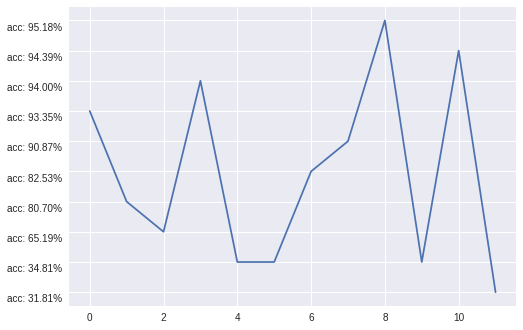

In [27]:
from numpy.random import seed 
from tensorflow import set_random_seed
from sklearn.preprocessing import *
rownumber  = 0
for fun in funct:
  set_random_seed(2)
  seed(7) 
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  model = Sequential()
  model.add(Dense(1050, input_dim=8, kernel_initializer='RandomNormal', activation='relu' )) #bias_initializer='zeros'
  model.add(Dense(525, kernel_initializer='RandomNormal', activation='tanh'))
  model.add(Dense(125, kernel_initializer='RandomNormal', activation='relu'))
  model.add(Dense(1, kernel_initializer='RandomNormal', activation='sigmoid'))
  model.compile(loss=fun, optimizer='RMSprop', metrics=['accuracy'])
  history = model.fit(X, Y, epochs=150, batch_size=97,validation_split=0.20 ) #shuffle = False, 
  scores = model.evaluate(X, Y)
  analysisdf.loc[rownumber,"loss function"]=  fun
  analysisdf.loc[rownumber,"accuracy"]= ("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  wks.set_dataframe(analysisdf,(1,1))
  rownumber  += 1
plt.plot(analysisdf["accuracy"])

To conclude we can use binary cross entropy as the loss the get the best accuracy